In [1]:
%config IPCompleter.greedy=True 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import utility as uti
import matplotlib.lines as mlines
import Code_for_cluster.fasta_file.extract_msa as ex_msa

cmaps_sns = sns.color_palette("colorblind", 10)
l_AF = [0, 3, 2, 8, 1, 4, 5, 6, 7, 9]
cmaps = []
for i in l_AF:
    cmaps.append(cmaps_sns[i])
sns.set_theme(context='notebook', style='ticks', palette=cmaps, color_codes=True, rc=None)

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    "font.family": "arial",
    # Use 10pt font in plots, to maT_ch 10pt font in document
    "font.size": 10,
    "axes.titlesize" : 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "axes.labelsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "lines.linewidth" : 1.3,
    'axes.linewidth' : 1,
}
plt.rcParams.update(tex_fonts)

def annotate_all(ax):
    try:
        shape = ax.shape
    except:
        #no shape so no panels
        ax.margins(x=0)
        return None
    if len(ax.shape)==1:
        n = ax.shape[0]
        if n==2:
            for i in range(n):
                #ax[i].set_title("%s: $\mu = %s$"%(l_letter[i], l_mu[i]))
                ax[i].margins(x=0)
        else:
            for i in range(n):
                annotate(i, ax=ax[i])
                ax[i].margins(x=0)
    elif len(ax.shape)==2:
        n,k = ax.shape
        for i in range(n):
            for j in range(k):
                #annotate(i*n + j, ax=ax[i,j])
                ax[i, j].margins(x=0)
                
def mean_number_pair_species():
    fasta_file = "Code_for_cluster/fasta_file/Concat_nnn_withFirst.fasta"
    d_species = ex_msa.dictionnary_species(fasta_file)
    l = []
    for key,list_ind in d_species.items():
        if len(list_ind)>=2:
            l.append(len(list_ind))
    return np.mean(l)


label_r = "Natural data"
label_0 = "Contacts only"
label_1 = "Phylo rand."
label_2 = "Contacts &\nphylogeny"
label_3 = "Phylogeny only"
label_4 = " Null model"
ylabel = "Correct predictions\nfraction"

l_size_train = np.load("Code_for_cluster/output_inference_partners_generated/l_size_train.npy")
#l_plot = np.load("Code_for_cluster/output_inference_partners_generated/l_plot.npy")
l_plot = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_real_species.npy")

l_plot_no_phylo_ccmpred = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_no_phylo_ccmpred.npy")
l_plot_phylo_tree_ccmpred = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_tree_ccmpred.npy")
l_plot_phylo_equi_tree_ccmpred = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_equi_tree_ccmpred.npy")
l_plot_phylo_tree_auto_ccmpred = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_tree_auto_rate_ccmpred.npy")
l_plot_phylo_equi_tree_auto_ccmpred = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_equi_tree_auto_rate_ccmpred.npy")

l_plot_no_phylo_bmdca = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_no_phylo_bmdca.npy")
l_plot_phylo_tree_bmdca = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_tree_bmdca.npy")
l_plot_phylo_equi_tree_bmdca = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_equi_tree_bmdca.npy")

l_plot_no_phylo_ardca = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_no_phylo_ardca.npy")
l_plot_phylo_tree_ardca = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_tree_ardca.npy")
l_plot_phylo_equi_tree_ardca = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_equi_tree_ardca.npy")


## Delete false coupling

In [2]:
l_size_train = np.load("Code_for_cluster/output_inference_partners_generated/l_size_train_graph_4.npy")
l_plot_graph_4 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_real_species_graph_4.npy")

l_plot_no_phylo_ccmpred_graph_4 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_no_phylo_ccmpred_graph_4.npy")
l_plot_phylo_tree_ccmpred_graph_4 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_tree_ccmpred_graph_4.npy")
l_plot_phylo_equi_tree_ccmpred_graph_4 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_equi_tree_ccmpred_graph_4.npy")

l_plot_phylo_tree_auto_ccmpred_graph_4 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_tree_auto_rate_ccmpred_graph_4.npy")
l_plot_phylo_equi_tree_auto_ccmpred_graph_4 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_equi_tree_auto_rate_ccmpred_graph_4.npy")

l_plot_no_phylo_bmdca_graph_4 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_no_phylo_bmdca_graph_4.npy")
l_plot_phylo_tree_bmdca_graph_4 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_tree_bmdca_graph_4.npy")
l_plot_phylo_equi_tree_bmdca_graph_4 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_equi_tree_bmdca_graph_4.npy")

l_plot_no_phylo_ardca_graph_4 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_no_phylo_ardca_graph_4.npy")
l_plot_phylo_tree_ardca_graph_4 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_tree_ardca_graph_4.npy")
l_plot_phylo_equi_tree_ardca_graph_4 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_equi_tree_ardca_graph_4.npy")

### Other threshold contact #####

l_plot_graph_8 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_real_species_graph_8.npy")

l_plot_no_phylo_ccmpred_graph_8 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_no_phylo_ccmpred_graph_8.npy")
l_plot_phylo_tree_ccmpred_graph_8 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_tree_ccmpred_graph_8.npy")
l_plot_phylo_equi_tree_ccmpred_graph_8 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_equi_tree_ccmpred_graph_8.npy")

l_plot_phylo_tree_auto_ccmpred_graph_8 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_tree_auto_rate_ccmpred_graph_8.npy")
l_plot_phylo_equi_tree_auto_ccmpred_graph_8 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_equi_tree_auto_rate_ccmpred_graph_8.npy")

l_plot_no_phylo_bmdca_graph_8 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_no_phylo_bmdca_graph_8.npy")
l_plot_phylo_tree_bmdca_graph_8 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_tree_bmdca_graph_8.npy")
l_plot_phylo_equi_tree_bmdca_graph_8 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_equi_tree_bmdca_graph_8.npy")

l_plot_no_phylo_ardca_graph_8 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_no_phylo_ardca_graph_8.npy")
l_plot_phylo_tree_ardca_graph_8 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_tree_ardca_graph_8.npy")
l_plot_phylo_equi_tree_ardca_graph_8 = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_equi_tree_ardca_graph_8.npy")

## False_Contact ## Available for threshold 4 or 8
l_plot_graph_4_false_contact = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_real_species_graph_4_false_contact=True.npy")

l_plot_no_phylo_bmdca_graph_4_false_contact = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_no_phylo_bmdca_graph_4_false_contact=True.npy")
l_plot_phylo_tree_bmdca_graph_4_false_contact = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_tree_bmdca_graph_4_false_contact=True.npy")
l_plot_phylo_equi_tree_bmdca_graph_4_false_contact = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_equi_tree_bmdca_graph_4_false_contact=True.npy")

l_plot_no_phylo_ardca_graph_4_false_contact = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_no_phylo_ardca_graph_4_false_contact=True.npy")
l_plot_phylo_tree_ardca_graph_4_false_contact = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_tree_ardca_graph_4_false_contact=True.npy")
l_plot_phylo_equi_tree_ardca_graph_4_false_contact = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_equi_tree_ardca_graph_4_false_contact=True.npy")

#### 8 
l_plot_graph_8_false_contact = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_real_species_graph_8_false_contact=True.npy")

l_plot_no_phylo_bmdca_graph_8_false_contact = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_no_phylo_bmdca_graph_8_false_contact=True.npy")
l_plot_phylo_tree_bmdca_graph_8_false_contact = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_tree_bmdca_graph_8_false_contact=True.npy")
l_plot_phylo_equi_tree_bmdca_graph_8_false_contact = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_equi_tree_bmdca_graph_8_false_contact=True.npy")

l_plot_no_phylo_ardca_graph_8_false_contact = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_no_phylo_ardca_graph_8_false_contact=True.npy")
l_plot_phylo_tree_ardca_graph_8_false_contact = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_tree_ardca_graph_8_false_contact=True.npy")
l_plot_phylo_equi_tree_ardca_graph_8_false_contact = np.load("Code_for_cluster/output_inference_partners_generated/l_plot_phylo_equi_tree_ardca_graph_8_false_contact=True.npy")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


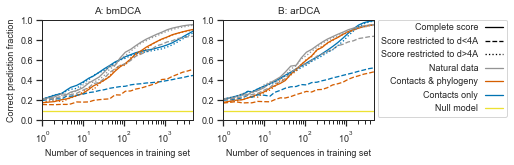

In [20]:
label_0 = "Contacts only"
label_1 = "Phylo rand."
label_2 = "Contacts & phylogeny"
label_3 = "Phylogeny only"
label_4 = "Null model"
ylabel = "Correct prediction fraction"
xlabel = "Number of sequences in training set"
color_natural_data = cmaps[8]

width = "article"
figsize = uti.set_size(width, subplots=(1,2))
fig, ax =  plt.subplots(figsize=figsize, nrows=1, ncols=2)

### No threshold #####

ax[0].plot(l_size_train,l_plot_no_phylo_bmdca, label = label_0)
ax[0].plot(l_size_train,l_plot_phylo_equi_tree_bmdca, label = label_2)

ax[1].plot(l_size_train,l_plot_no_phylo_ardca, label = label_0)
ax[1].plot(l_size_train,l_plot_phylo_equi_tree_ardca,  label = label_2)

ax[0].plot(l_size_train,l_plot, label = "Natural data", color=color_natural_data)
ax[1].plot(l_size_train,l_plot, label = "Natural data", color=color_natural_data)

ax[0].hlines(1/mean_number_pair_species(), l_size_train[0], l_size_train[-1], color = cmaps[3])
ax[1].hlines(1/mean_number_pair_species(), l_size_train[0], l_size_train[-1], color = cmaps[3])

ax[0].set_ylabel(ylabel)
ax[0].set_xlabel(xlabel)
ax[1].set_xlabel(xlabel)
ax[0].semilogx()
ax[1].semilogx()
ax[0].set_title("A: bmDCA")
ax[1].set_title("B: arDCA")

Lhandles = []
Lhandles.append(mlines.Line2D([],[], ls="-", color="black", label = "Complete score"))
Lhandles.append(mlines.Line2D([],[], ls="--", color="black", label = "Score restricted to d<4A"))
Lhandles.append(mlines.Line2D([],[], ls="dotted", color="black", label = "Score restricted to d>4A"))
Lhandles.append(mlines.Line2D([],[], color=color_natural_data, label = "Natural data"))
Lhandles.append( mlines.Line2D([], [], color=cmaps[1], markersize=15, label=label_2))
Lhandles.append( mlines.Line2D([], [], color=cmaps[0], label=label_0 ))
Lhandles.append( mlines.Line2D([], [], color=cmaps[3], markersize=15, label=label_4))
ax[1].legend(handles=Lhandles,loc="upper right",markerfirst=False, bbox_to_anchor=(1.91, 1.05))

Lhandles[0] = mlines.Line2D([],[], ls="--", color="black", label = "Threshold 4A contact")    

ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)

### threshold 4 ######
ax[0].plot(l_size_train,l_plot_no_phylo_bmdca_graph_4, label = "Independent sequence bmDCA", ls="--", color=cmaps[0])
ax[0].plot(l_size_train,l_plot_phylo_equi_tree_bmdca_graph_4, label = "Tree equi start bmDCA", ls="--", color=cmaps[1])

ax[1].plot(l_size_train,l_plot_no_phylo_ardca_graph_4, label = "Independent sequence arDCA", ls="--", color=cmaps[0])
ax[1].plot(l_size_train,l_plot_phylo_equi_tree_ardca_graph_4,  label = "Tree equi start arDCA", ls="--", color=cmaps[1])

ax[0].plot(l_size_train, l_plot_graph_4, label = "Natural data", ls="--", color=color_natural_data)
ax[1].plot(l_size_train, l_plot_graph_4, label = "Natural data", ls="--", color=color_natural_data)

### threshold 4  of non contact ######
ax[0].plot(l_size_train,l_plot_no_phylo_bmdca_graph_4_false_contact, label = "Independent sequence bmDCA", ls="dotted", color=cmaps[0])
ax[0].plot(l_size_train,l_plot_phylo_equi_tree_bmdca_graph_4_false_contact, label = "Tree equi start bmDCA", ls="dotted", color=cmaps[1])

ax[1].plot(l_size_train,l_plot_no_phylo_ardca_graph_4_false_contact, label = "Independent sequence arDCA", ls="dotted", color=cmaps[0])
ax[1].plot(l_size_train,l_plot_phylo_equi_tree_ardca_graph_4_false_contact,  label = "Tree equi start arDCA", ls="dotted", color=cmaps[1])

ax[0].plot(l_size_train, l_plot_graph_4_false_contact, label = "Natural data", ls="dotted", color=color_natural_data)
ax[1].plot(l_size_train, l_plot_graph_4_false_contact, label = "Natural data", ls="dotted", color=color_natural_data)

annotate_all(ax)

plt.savefig("figures/FIG_6_Inference_partners_21_states_threshold_contact.eps", bbox_inches = "tight")

## Non contact

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


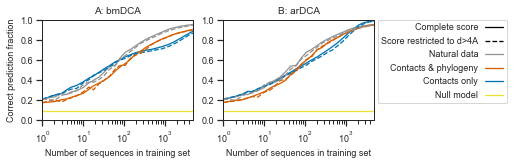

In [4]:
figsize = uti.set_size(width, subplots=(1,2))
fig, ax =  plt.subplots(figsize=figsize, nrows=1, ncols=2)

### No threshold #####

ax[0].plot(l_size_train,l_plot_no_phylo_bmdca, label = label_0)
ax[0].plot(l_size_train,l_plot_phylo_equi_tree_bmdca, label = label_2)

ax[1].plot(l_size_train,l_plot_no_phylo_ardca, label = label_0)
ax[1].plot(l_size_train,l_plot_phylo_equi_tree_ardca,  label = label_2)

ax[0].plot(l_size_train,l_plot, label = "Natural data", color=color_natural_data)
ax[1].plot(l_size_train,l_plot, label = "Natural data", color=color_natural_data)

ax[0].hlines(1/mean_number_pair_species(), l_size_train[0], l_size_train[-1], color = cmaps[3])
ax[1].hlines(1/mean_number_pair_species(), l_size_train[0], l_size_train[-1], color = cmaps[3])

ax[0].set_ylabel(ylabel)
ax[0].set_xlabel(xlabel)
ax[1].set_xlabel(xlabel)
ax[0].semilogx()
ax[1].semilogx()
ax[0].set_title("A: bmDCA")
ax[1].set_title("B: arDCA")

Lhandles = []
Lhandles.append(mlines.Line2D([],[], ls="-", color="black", label = "Complete score"))
Lhandles.append(mlines.Line2D([],[], ls="--", color="black", label = "Score restricted to d>4A"))
Lhandles.append(mlines.Line2D([],[], color=color_natural_data, label = "Natural data"))
Lhandles.append( mlines.Line2D([], [], color=cmaps[1], markersize=15, label=label_2))
Lhandles.append( mlines.Line2D([], [], color=cmaps[0], label=label_0 ))
Lhandles.append( mlines.Line2D([], [], color=cmaps[3], markersize=15, label=label_4))
ax[1].legend(handles=Lhandles,loc="upper right",markerfirst=False, bbox_to_anchor=(1.91, 1.05))

Lhandles[0] = mlines.Line2D([],[], ls="--", color="black", label = "Threshold 4A contact")    

ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)

### threshodl 4  of non cotanct ######
ax[0].plot(l_size_train,l_plot_no_phylo_bmdca_graph_4_false_contact, label = "Independent sequence bmDCA", ls="--", color=cmaps[0])
ax[0].plot(l_size_train,l_plot_phylo_equi_tree_bmdca_graph_4_false_contact, label = "Tree equi start bmDCA", ls="--", color=cmaps[1])

ax[1].plot(l_size_train,l_plot_no_phylo_ardca_graph_4_false_contact, label = "Independent sequence arDCA", ls="--", color=cmaps[0])
ax[1].plot(l_size_train,l_plot_phylo_equi_tree_ardca_graph_4_false_contact,  label = "Tree equi start arDCA", ls="--", color=cmaps[1])

ax[0].plot(l_size_train, l_plot_graph_4_false_contact, label = "Natural data", ls="--", color=color_natural_data)
ax[1].plot(l_size_train, l_plot_graph_4_false_contact, label = "Natural data", ls="--", color=color_natural_data)

annotate_all(ax)

plt.savefig("figures/Bonus_Inference_partners_21_states_threshold_false_contact_4.eps", bbox_inches = "tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


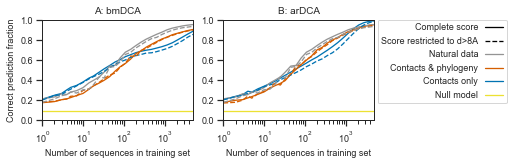

In [5]:
figsize = uti.set_size(width, subplots=(1,2))
fig, ax =  plt.subplots(figsize=figsize, nrows=1, ncols=2)

### No threshold #####

ax[0].plot(l_size_train,l_plot_no_phylo_bmdca, label = label_0)
ax[0].plot(l_size_train,l_plot_phylo_equi_tree_bmdca, label = label_2)

ax[1].plot(l_size_train,l_plot_no_phylo_ardca, label = label_0)
ax[1].plot(l_size_train,l_plot_phylo_equi_tree_ardca,  label = label_2)

ax[0].plot(l_size_train,l_plot, label = "Natural data", color=color_natural_data)
ax[1].plot(l_size_train,l_plot, label = "Natural data", color=color_natural_data)

ax[0].hlines(1/mean_number_pair_species(), l_size_train[0], l_size_train[-1], color = cmaps[3])
ax[1].hlines(1/mean_number_pair_species(), l_size_train[0], l_size_train[-1], color = cmaps[3])

ax[0].set_ylabel(ylabel)
ax[0].set_xlabel(xlabel)
ax[1].set_xlabel(xlabel)
ax[0].semilogx()
ax[1].semilogx()
ax[0].set_title("A: bmDCA")
ax[1].set_title("B: arDCA")

Lhandles = []
Lhandles.append(mlines.Line2D([],[], ls="-", color="black", label = "Complete score"))
Lhandles.append(mlines.Line2D([],[], ls="--", color="black", label = "Score restricted to d>8A"))
Lhandles.append(mlines.Line2D([],[], color=color_natural_data, label = "Natural data"))
Lhandles.append( mlines.Line2D([], [], color=cmaps[1], markersize=15, label=label_2))
Lhandles.append( mlines.Line2D([], [], color=cmaps[0], label=label_0 ))
Lhandles.append( mlines.Line2D([], [], color=cmaps[3], markersize=15, label=label_4))
ax[1].legend(handles=Lhandles,loc="upper right",markerfirst=False, bbox_to_anchor=(1.91, 1.05))

Lhandles[0] = mlines.Line2D([],[], ls="--", color="black", label = "Threshold 4A contact")    

ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)

### threshodl 8  of non cotanct ######
ax[0].plot(l_size_train,l_plot_no_phylo_bmdca_graph_8_false_contact, label = "Independent sequence bmDCA", ls="--", color=cmaps[0])
ax[0].plot(l_size_train,l_plot_phylo_equi_tree_bmdca_graph_8_false_contact, label = "Tree equi start bmDCA", ls="--", color=cmaps[1])

ax[1].plot(l_size_train,l_plot_no_phylo_ardca_graph_8_false_contact, label = "Independent sequence arDCA", ls="--", color=cmaps[0])
ax[1].plot(l_size_train,l_plot_phylo_equi_tree_ardca_graph_8_false_contact,  label = "Tree equi start arDCA", ls="--", color=cmaps[1])

ax[0].plot(l_size_train, l_plot_graph_8_false_contact, label = "Natural data", ls="--", color=color_natural_data)
ax[1].plot(l_size_train, l_plot_graph_8_false_contact, label = "Natural data", ls="--", color=color_natural_data)

annotate_all(ax)

plt.savefig("figures/Bonus_Inference_partners_21_states_threshold_false_contact_8.eps", bbox_inches = "tight")